In [1]:
from hull3D import ConvexHull3D
import numpy as np

import mpl_toolkits.mplot3d as mpl3D
import matplotlib.pyplot as plt

np.random.seed(20)
# pts = np.random.randint(-100, 100, (50,3))
# 读取文件并解析点数据
def read_points_from_file(file_path):
    points = []
    with open(file_path, 'r') as file:
        for line in file:
            # 去除换行符并按空格分割每行数据
            coords = line.strip().split()
            # 将字符串转换为浮点数或整数，并添加到列表中
            point = [float(coord) for coord in coords]
            points.append(point)
    
    # 将列表转换为numpy数组，方便后续操作
    return np.array(points)

# 假设文件名为 'points.dot'
file_path = 'points.dot'
points = read_points_from_file(file_path)

In [2]:
Hull = ConvexHull3D(points, run=True, make_frames=True, frames_dir='./frames/')

Generating frame  2
Generating frame  4
Generating frame  6
Generating frame  8
Generating frame  10
Generating frame  12
Generating frame  14
Generating frame  16
Generating frame  18
Point is inside or coplanar, skipping update.
Generating frame  19
Generating frame  21
Generating frame  23
Point is inside or coplanar, skipping update.
Generating frame  24
Point is inside or coplanar, skipping update.
Generating frame  25
Generating frame  27
Generating frame  29
Generating frame  31
Generating frame  33
Generating frame  35
Generating frame  37
Generating frame  39
Point is inside or coplanar, skipping update.
Generating frame  40
Point is inside or coplanar, skipping update.
Generating frame  41
Generating frame  43
Generating frame  45
Point is inside or coplanar, skipping update.
Generating frame  46
Point is inside or coplanar, skipping update.
Generating frame  47
Generating frame  49
Generating frame  51
Generating frame  53
Generating frame  55
Point is inside or coplanar, sk

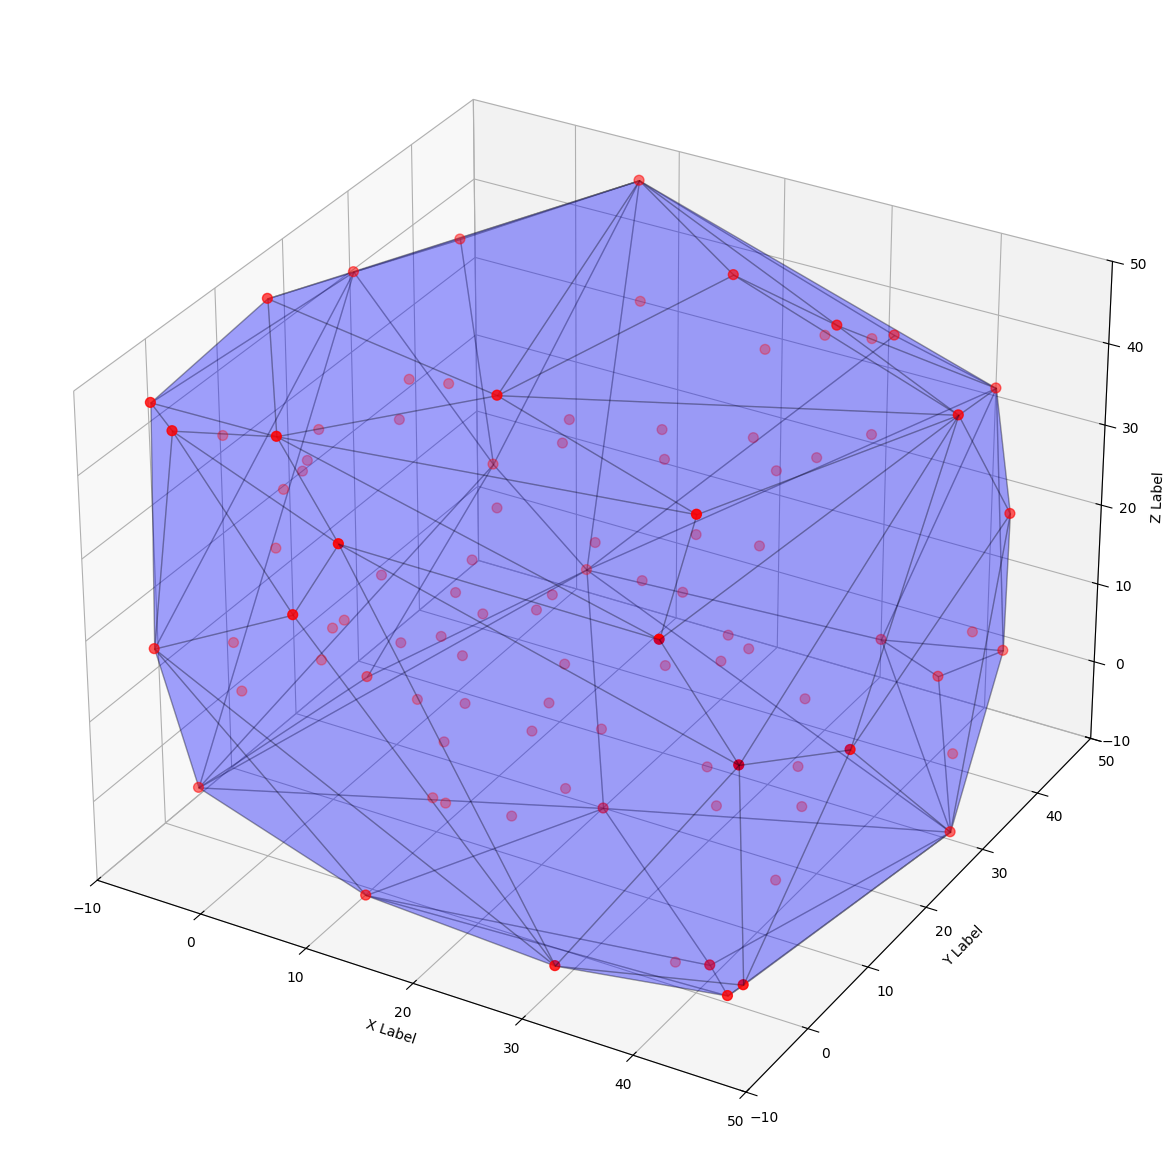

In [3]:
pts = Hull.pts   # to get pts in order used by ConvexHull3d
vertices = []
in_points = []
for i, pt in enumerate(pts):
    if i in Hull.getVertexIndices():
        vertices.append(pt)
    else:
        in_points.append(pt)
vertices = np.array(vertices)
in_points = np.array(in_points)
fig = plt.figure(figsize=[20, 15])  # 创建图形窗口
ax = fig.add_subplot(111, projection='3d')  # 在图形窗口中添加三维坐标轴
ax.set_xlim([Hull.boxmin,Hull.boxmax])
ax.set_ylim([Hull.boxmin,Hull.boxmax])
ax.set_zlim([Hull.boxmin,Hull.boxmax])
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')
ax.scatter(vertices[:,0], vertices[:,1], vertices[:,2], s=50, c='r', marker='o')
ax.scatter(in_points[:,0], in_points[:,1], in_points[:,2], s=50, c='r', marker='o', alpha=0.3)

for face in Hull.DCEL.faceDict.values():
    tri = mpl3D.art3d.Poly3DCollection([[list(v.p()) for v in face.loopOuterVertices()]])
    tri.set_facecolor((0,0,1, 0.2)) # add functionality for visible faces later
    #tri.set_alpha(0.1)
    tri.set_edgecolor((0,0,0, 0.2))
    ax.add_collection3d(tri)

In [9]:
import numpy as np
import plotly.graph_objects as go

# 假设 vertices 和 in_points 已经定义
vertices_trace = go.Scatter3d(
    x=vertices[:, 0],
    y=vertices[:, 1],
    z=vertices[:, 2],
    mode='markers',
    marker=dict(size=5, color='red', opacity=1),
    name='Convex Hull Vertices'
)

in_points_trace = go.Scatter3d(
    x=in_points[:, 0],
    y=in_points[:, 1],
    z=in_points[:, 2],
    mode='markers',
    marker=dict(size=5, color='red', opacity=0.3),
    name='Inside Points'
)

# 用于显示顶点之间的连线
edges_x = []
edges_y = []
edges_z = []

for face in Hull.DCEL.faceDict.values():
    vertices_face = np.array([list(v.p()) for v in face.loopOuterVertices()])
    # 遍历顶点对，将它们添加为线
    for i in range(len(vertices_face)):
        for j in range(i+1, len(vertices_face)):
            edges_x.extend([vertices_face[i][0], vertices_face[j][0], None])
            edges_y.extend([vertices_face[i][1], vertices_face[j][1], None])
            edges_z.extend([vertices_face[i][2], vertices_face[j][2], None])

lines_trace = go.Scatter3d(
    x=edges_x,
    y=edges_y,
    z=edges_z,
    mode='lines',
    line=dict(color='black', width=2),
    name='Edges'
)

# 创建三角面
triangles = []
for face in Hull.DCEL.faceDict.values():
    vertices_face = np.array([list(v.p()) for v in face.loopOuterVertices()])
    indices = [0, 1, 2]  # 这里我们假设每个面由三个顶点组成
    triangles.append(go.Mesh3d(
        x=vertices_face[:, 0],
        y=vertices_face[:, 1],
        z=vertices_face[:, 2],
        i=[indices[0]],  # 三角形的顶点索引
        j=[indices[1]],  # 三角形的顶点索引
        k=[indices[2]],  # 三角形的顶点索引
        color='blue',
        opacity=0.2,
        name='Faces',
        contour=dict(
            show=True,
            color='black',  # 设置边的颜色
            width=5  # 设置边的宽度
        )
    ))

# 创建图形
fig = go.Figure(data=[vertices_trace, in_points_trace, lines_trace] + triangles)

# 设置坐标轴标签
fig.update_layout(
    scene=dict(
        xaxis_title='X Label',
        yaxis_title='Y Label',
        zaxis_title='Z Label'
    ),
    title='Interactive 3D Convex Hull with Edges',
    width=800,
    height=800
)

# 显示图形
fig.show()

In [10]:
fig.write_html("convex_hull.html")